This code is for seeking various soil, whose soil organic carbon (SOC) is diverse, in restricted location. <br/>

- Dataset <br/>
(1) Sentinel2_9Bands_Bare_0621.csv : for making a cluster model according to SOC <br/>
(2) Sample_A.csv : (preliminary experiment data) for testing the cluster model <br/>

- Process <br/>
(1) Dimension-reduction : PCA <br/>
(2) K-means Clustering

### Upload Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_origin = pd.read_csv("./Sentinel2_9Bands_Bare_0621.csv")
X = X_origin.iloc[:,2:]  # remove the first two columns
X

,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66
0,3347.0,2870.0,5451.0,6091.0,4945.0,4784.0,4556.0,4258.0,3807.0
1,3349.0,2889.0,5550.0,6164.0,4983.0,4817.0,4580.0,4281.0,3838.0
2,3362.0,2901.0,5523.0,6192.0,4961.0,4802.0,4567.0,4278.0,3851.0
3,3391.0,2877.0,5529.0,6233.0,5021.0,4853.0,4601.0,4322.0,3848.0
4,2576.0,2266.0,4759.0,5309.0,3849.0,3724.0,3475.0,3161.0,2913.0
...,...,...,...,...,...,...,...,...,...
401,3210.0,2744.0,4690.0,5732.0,5316.0,5205.0,4856.0,4143.0,3696.0
402,3153.0,2727.0,5104.0,6191.0,5043.0,4832.0,4571.0,4168.0,3592.0
403,2456.0,2194.0,4619.0,5030.0,3775.0,3592.0,3355.0,3049.0,2787.0
404,3281.0,2825.0,4784.0,5796.0,5489.0,5418.0,4951.0,4230.0,3749.0


### Dimension Reduction: Try (1)PCA (2)k-sne

PCA minimizes the loss of information of data <br/>
K-sne is advantageous to visualize clustering

#### (1) PCA

In [15]:
# 2-dimension PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)
pca_2d.components_.T

array([[-0.2839196 , -0.0997229 ],
       [-0.21396869, -0.10634307],
       [-0.25597263, -0.67223129],
       [-0.32293447, -0.38601404],
       [-0.39157184,  0.36958943],
       [-0.38810714,  0.38258504],
       [-0.38264989,  0.28459135],
       [-0.37797935, -0.04968587],
       [-0.33249573, -0.10684645]])

In [4]:
# 3-dimension PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)
pca_3d.components_.T

array([[-2.83919601e-01, -9.97228976e-02, -4.04540365e-01],
       [-2.13968695e-01, -1.06343072e-01, -4.65815770e-01],
       [-2.55972630e-01, -6.72231295e-01, -1.47636375e-01],
       [-3.22934472e-01, -3.86014036e-01,  7.43007455e-01],
       [-3.91571843e-01,  3.69589427e-01,  1.09711125e-01],
       [-3.88107135e-01,  3.82585043e-01,  1.02975275e-01],
       [-3.82649894e-01,  2.84591348e-01, -2.45296671e-04],
       [-3.77979352e-01, -4.96858705e-02, -6.72735751e-02],
       [-3.32495729e-01, -1.06846453e-01, -1.35425073e-01]])

In [5]:
# 2-dimension PCA, 설명된 분산의 비율
pca_2d.explained_variance_ratio_

array([0.78175628, 0.18987818])

In [6]:
# 2-dimension PCA, Percentage of variance lost by 2-D projection
1-sum(pca_2d.explained_variance_ratio_)

0.028365542782759712

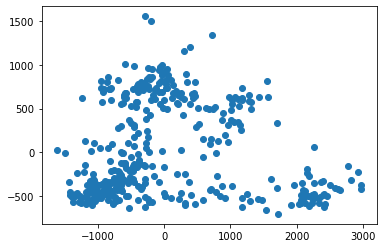

In [7]:
# 2-D PCA plot
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1])
plt.show()

C:\Users\uyoung\AppData\Local\Temp\ipykernel_26692\1623210618.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


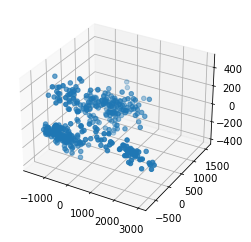

In [8]:
# 3-D PCA plot
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)
pca_3d.n_components_

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2])

#### (2) k-sne

In [16]:
# 3-D PCA
tsne_3d = TSNE(n_components=3, random_state=42)
X_ksne_3d = tsne_3d.fit_transform(X)

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\uyoung\AppData\Local\Temp\ipykernel_26692\26037852.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


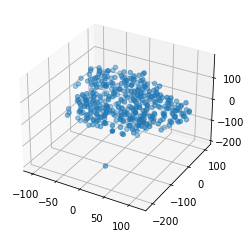

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X_ksne_3d[:,0], X_ksne_3d[:,1], X_ksne_3d[:,2])

Not nearly grouping. <br/>
Therefore, we will use PCA for dimension reduction.

### K-means clustering

In [13]:
k=5

#### 1) 2-D PCA

In [18]:
print(np.shape(X_pca_2d))

kmeans_2d = KMeans(n_clusters=k, random_state=42)
y_pred_2d = kmeans_2d.fit_predict(X_pca_2d)
# y_pred_2d

(406, 2)


In [19]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

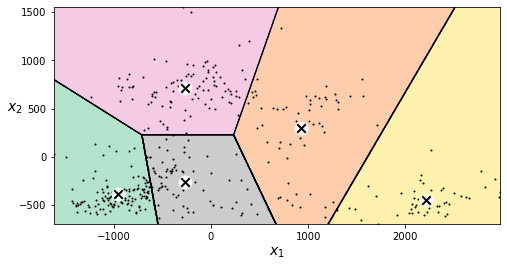

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_2d, X_pca_2d)
# plt.savefig("voronoi_plot")
plt.show()

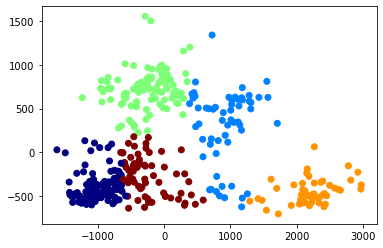

In [21]:
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y_pred_2d, cmap="jet")

# 하늘, 주황, 초록, 빨간, 짙은파랑

Centroid(clustering index) add to last column.

In [22]:
X_2d = pd.DataFrame(X_origin)
X_2d['centroid'] = y_pred_2d
X_2d

,xcoord,ycoord,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66,centroid
0,368392.288,4.107111e+06,3347.0,2870.0,5451.0,6091.0,4945.0,4784.0,4556.0,4258.0,3807.0,0
1,368412.288,4.107111e+06,3349.0,2889.0,5550.0,6164.0,4983.0,4817.0,4580.0,4281.0,3838.0,0
2,368432.288,4.107111e+06,3362.0,2901.0,5523.0,6192.0,4961.0,4802.0,4567.0,4278.0,3851.0,0
3,368452.288,4.107111e+06,3391.0,2877.0,5529.0,6233.0,5021.0,4853.0,4601.0,4322.0,3848.0,0
4,365512.288,4.113091e+06,2576.0,2266.0,4759.0,5309.0,3849.0,3724.0,3475.0,3161.0,2913.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
401,367812.288,4.111411e+06,3210.0,2744.0,4690.0,5732.0,5316.0,5205.0,4856.0,4143.0,3696.0,2
402,365872.288,4.111491e+06,3153.0,2727.0,5104.0,6191.0,5043.0,4832.0,4571.0,4168.0,3592.0,4
403,365792.288,4.113211e+06,2456.0,2194.0,4619.0,5030.0,3775.0,3592.0,3355.0,3049.0,2787.0,3
404,367832.288,4.111411e+06,3281.0,2825.0,4784.0,5796.0,5489.0,5418.0,4951.0,4230.0,3749.0,2


#### 2) 3-D PCA

In [23]:
kmeans_3d = KMeans(n_clusters=k, random_state=42)
y_pred_3d = kmeans_3d.fit_predict(X_pca_3d)
# y_pred_3d

C:\Users\uyoung\AppData\Local\Temp\ipykernel_26692\1552176480.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


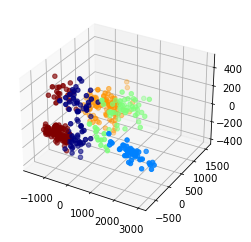

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=y_pred_3d, cmap="jet")

Centroid(clustering index) add to last column.

In [25]:
X_3d = pd.DataFrame(X_origin)
X_3d['centroid'] = y_pred_3d
X_3d

,xcoord,ycoord,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66,centroid
0,368392.288,4.107111e+06,3347.0,2870.0,5451.0,6091.0,4945.0,4784.0,4556.0,4258.0,3807.0,4
1,368412.288,4.107111e+06,3349.0,2889.0,5550.0,6164.0,4983.0,4817.0,4580.0,4281.0,3838.0,4
2,368432.288,4.107111e+06,3362.0,2901.0,5523.0,6192.0,4961.0,4802.0,4567.0,4278.0,3851.0,4
3,368452.288,4.107111e+06,3391.0,2877.0,5529.0,6233.0,5021.0,4853.0,4601.0,4322.0,3848.0,4
4,365512.288,4.113091e+06,2576.0,2266.0,4759.0,5309.0,3849.0,3724.0,3475.0,3161.0,2913.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
401,367812.288,4.111411e+06,3210.0,2744.0,4690.0,5732.0,5316.0,5205.0,4856.0,4143.0,3696.0,3
402,365872.288,4.111491e+06,3153.0,2727.0,5104.0,6191.0,5043.0,4832.0,4571.0,4168.0,3592.0,0
403,365792.288,4.113211e+06,2456.0,2194.0,4619.0,5030.0,3775.0,3592.0,3355.0,3049.0,2787.0,1
404,367832.288,4.111411e+06,3281.0,2825.0,4784.0,5796.0,5489.0,5418.0,4951.0,4230.0,3749.0,3


### 3) 7-D PCA & 5-Means Clustering

(1) origin data : fit_transform() 7-D PCA <br/>
(2) origin data :  5-means clustering <br/>
(3) Upload new data <br/>
(4) new data : (only) transform() 7-D PCA <br/>
(5) new data : 5-means clustering <br/>
(6) concat(origin data, new data) <br/>
(7) concat data : k-sne <br/>

In [37]:
# 7-dimension PCA
pca_7d = PCA(n_components=0.999)
X_pca_7d = pca_7d.fit_transform(X)
print(pca_7d.n_components_)
pca_7d.components_.T

7


array([[-2.83919601e-01, -9.97228976e-02, -4.04540365e-01,
        -1.06103379e-01, -3.57558318e-01, -5.14485783e-02,
        -8.03720667e-04],
       [-2.13968695e-01, -1.06343072e-01, -4.65815770e-01,
         2.81406753e-02, -5.85066366e-01,  1.33994699e-01,
         2.62535965e-02],
       [-2.55972630e-01, -6.72231295e-01, -1.47636375e-01,
         5.68594170e-01,  3.59450472e-01, -6.36077020e-02,
         5.31146110e-02],
       [-3.22934472e-01, -3.86014036e-01,  7.43007455e-01,
        -1.43963361e-01, -4.13774294e-01,  4.62179201e-02,
         1.69431735e-02],
       [-3.91571843e-01,  3.69589427e-01,  1.09711125e-01,
         3.57686342e-01, -2.15973175e-02, -1.86124899e-01,
        -7.13006737e-01],
       [-3.88107135e-01,  3.82585043e-01,  1.02975275e-01,
         2.00440180e-01,  4.88506725e-02, -2.68031715e-01,
         6.75855539e-01],
       [-3.82649894e-01,  2.84591348e-01, -2.45296671e-04,
         1.11358420e-01,  6.58652845e-02,  4.12328493e-01,
         1.3259467

In [27]:
kmeans_7d = KMeans(n_clusters=k, random_state=42)
y_pred_7d = kmeans_7d.fit_predict(X_pca_7d)
# y_pred_3d

#### (*) No PCA

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


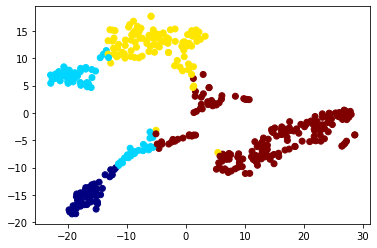

In [46]:
# no PCA
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_pred, cmap="jet")

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


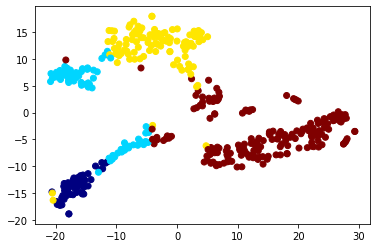

In [47]:
# no PCA
New = pd.read_csv("./Sample_A.csv")
New = New.iloc[:,1:]  # remove the first three columns

test_X = New.iloc[:,2:-1]  # new data
test_y = New.iloc[:,-1]    # y_label
test_X

test_y_pred = kmeans.fit_predict(test_X)
test_y_pred

# combine the new data with the original data
X_concat = np.concatenate((X, test_X), axis=0)
y_concat = np.concatenate((y_pred, test_y_pred), axis=0)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_concat)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_concat, cmap="jet")

-8


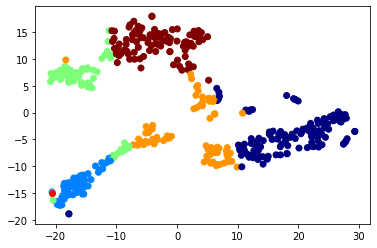

-7


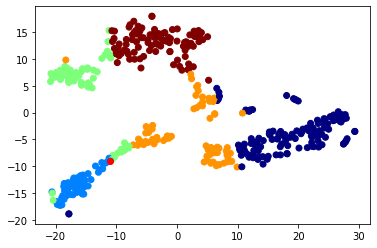

-6


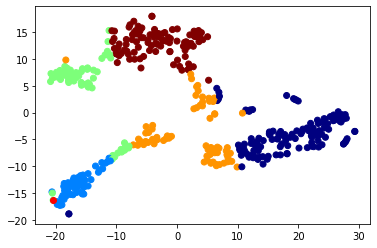

-5


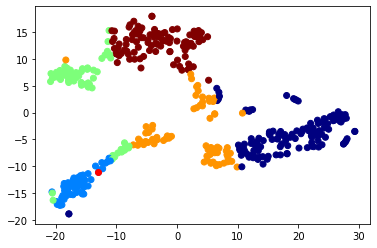

-4


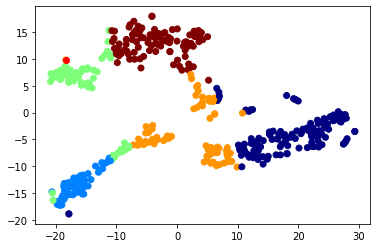

-3


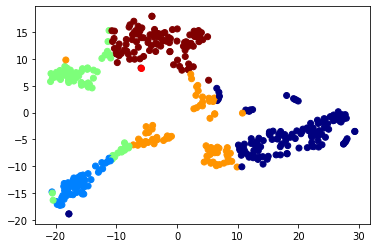

-2


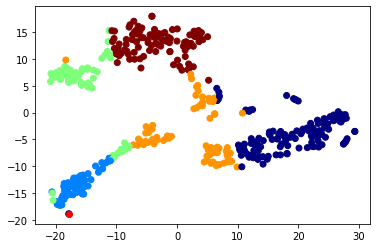

-1


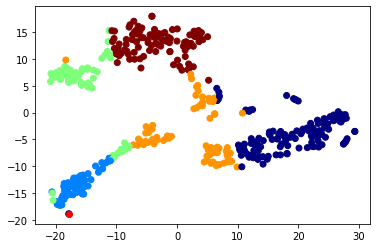

In [45]:
# no PCA
for i in range(-8,0,1):
    print(i)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_concat, cmap="jet")
    plt.scatter(X_tsne[i,0], X_tsne[i,1], c="red", cmap="jet")
    plt.show()

#### with PCA

Visualize by k-sne 

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


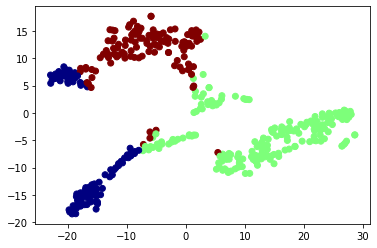

In [39]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_pred_7d, cmap="jet")

upload test data

In [10]:
New = pd.read_csv("./Sample_A.csv")
New = New.iloc[:,1:]  # remove the first three columns

test_X = New.iloc[:,2:-1]  # new data
test_y = New.iloc[:,-1]    # y_label
test_X

,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66
0,2492,2219,4360,4926,3935,3857,3537,3074,2754
1,2717,2390,4945,5525,4214,4083,3797,3512,3106
2,2383,2105,4217,4775,3815,3636,3426,2960,2692
3,2630,2323,4751,5296,4080,3885,3645,3381,3032
4,2976,2600,4185,4973,4838,4740,4243,3396,3190
5,3129,2686,4765,5800,5086,4889,4464,3727,3449
6,2353,2284,2788,3030,3079,2949,2830,2582,2382
7,2275,2212,2614,2877,2855,2901,2848,2538,2286


(1) PCA

In [30]:
test_X_pca = pca_7d.transform(test_X)  # Apply dimensionality reduction to the new data
# test_X_pca

(2) k-means clustering

In [31]:
test_y_pred = kmeans_7d.fit_predict(test_X_pca)
test_y_pred

array([2, 2, 2, 2, 0, 0, 1, 1])

(3) K-sne

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


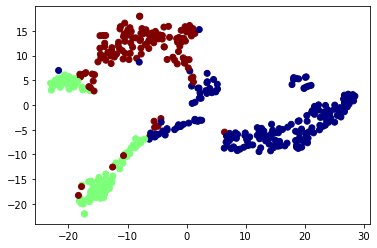

In [32]:
# combine the new data with the original data
X_7d = np.concatenate((X_pca_7d, test_X_pca), axis=0)
y_7d = np.concatenate((y_pred_7d, test_y_pred), axis=0)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_7d)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_7d, cmap="jet")

In [76]:
y_7d[-8:]

array([2, 1, 2, 1, 3, 4, 0, 0])

-8


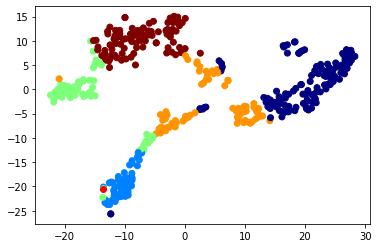

-7


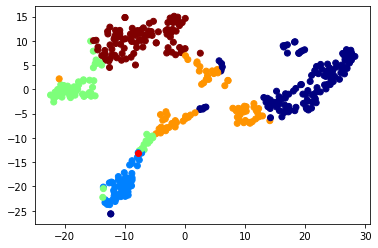

-6


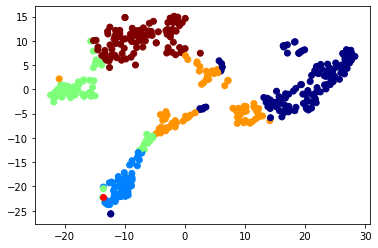

-5


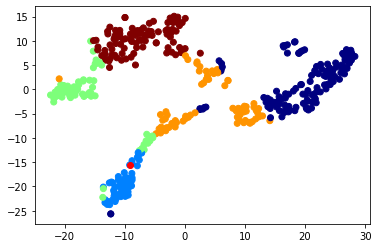

-4


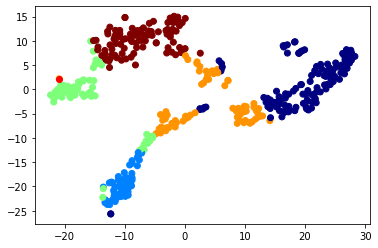

-3


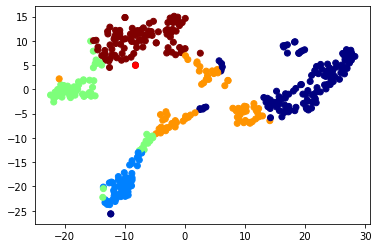

-2


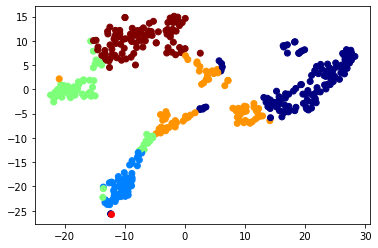

-1


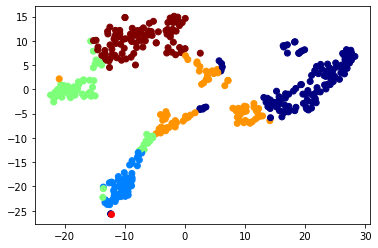

In [75]:
for i in range(-8,0,1):
    print(i)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_7d, cmap="jet")
    plt.scatter(X_tsne[i,0], X_tsne[i,1], c="red", cmap="jet")
    plt.show()

### No PCA & DBSCAN Clustering

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 5 min__sample



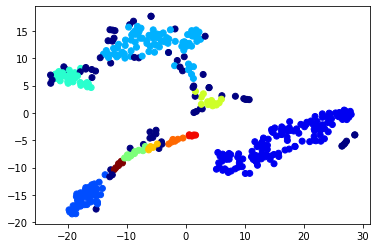

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 10 min__sample



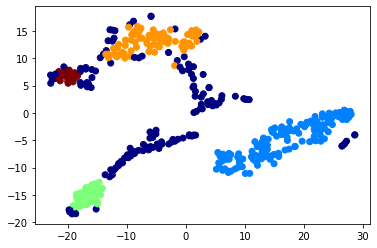

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 15 min__sample



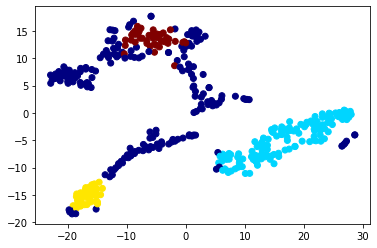

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 20 min__sample



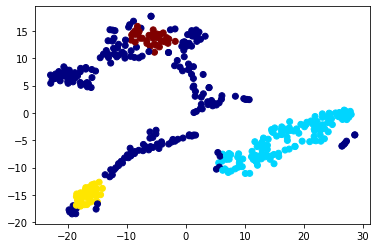

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 25 min__sample



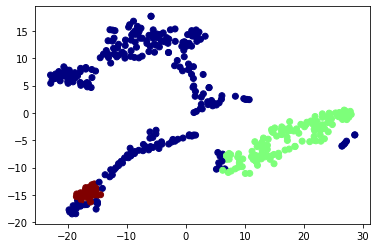

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 5 min__sample



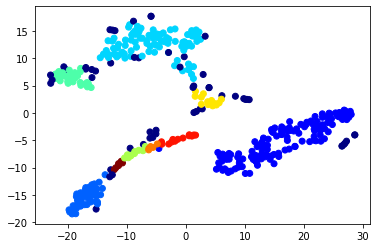

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 10 min__sample



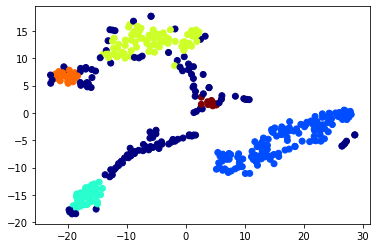

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 15 min__sample



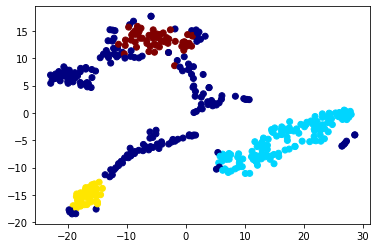

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 20 min__sample



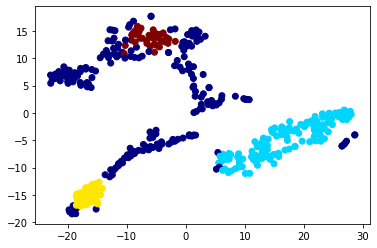

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyboardInterrupt: 

In [3]:
# create model and prediction
for i in range(250,400, 10):
    for k in range(5, 30, 5):
        dbscan = DBSCAN(eps=i,min_samples=k)
        clustering= dbscan.fit(X)
        y_dbscan = dbscan.fit_predict(X)
        y_pred = pd.DataFrame(y_dbscan)
        y_pred.columns=['predict']

        # concatenate labels to df as a new column
        r = pd.concat([X,y_pred],axis=1)

        # print(r)
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(X)
        
        print("{i} eps , {k} min__sample".format(i=i,k=k))
        
        print()
        plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_dbscan, cmap="jet")
        plt.show()

Find model : 250eps, 10samples

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 25 min__sample


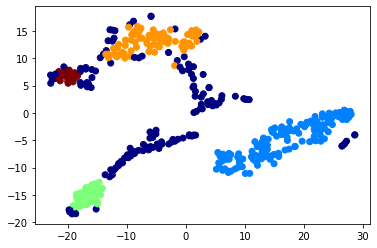

In [4]:
dbscan = DBSCAN(eps=250,min_samples=10)
clustering= dbscan.fit(X)
y_dbscan = dbscan.fit_predict(X)
y_pred = pd.DataFrame(y_dbscan)
y_pred.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([X,y_pred],axis=1)

# print(r)


# TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

print("{i} eps , {k} min__sample".format(i=i,k=k))

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_dbscan, cmap="jet")
plt.show()

In [5]:
clustering.labels_

array([ 0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1, -1,  1,  0,  0,
        0,  2,  2,  2, -1, -1,  3, -1,  3, -1, -1, -1,  2, -1, -1,  2, -1,
       -1, -1, -1, -1,  3,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1, -1, -1,
        1,  1,  0, -1,  1, -1, -1,  3,  3,  3, -1, -1, -1,  0,  0,  0,  0,
        0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3,  3, -1, -1, -1, -1, -1,  2, -1,  2,  2,  0,  0,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  3,  3,
       -1,  3,  2, -1,  3, -1, -1, -1, -1, -1,  2, -1,  1,  0,  0, -1,  0,
       -1, -1,  0, -1, -1,  0, -1,  0, -1,  0,  2,  0,  2,  0,  2,  2,  1,
        1, -1, -1,  1,  1,  1,  2, -1,  2,  0,  1,  0, -1,  0, -1,  0, -1,
        0, -1,  1,  2,  0, -1,  1, -1,  0,  1,  2,  0, -1,  1, -1,  0, -1,
        1,  1, -1,  2, -1,  2,  2, -1, -1, -1, -1, -1,  2, -1, -1, -1,  2,
       -1, -1,  3, -1,  3, -1,  3,  0, -1,  3,  0, -1,  3,  0, -1, -1, -1,
       -1,  0,  2,  0, -1

In [6]:
df = pd.DataFrame(X_tsne, columns=['x_tsne[0]', 'x_tsne[1]'])
df['predict'] = y_dbscan
outlier = np.array(df['predict'] != -1)
outlier

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False,

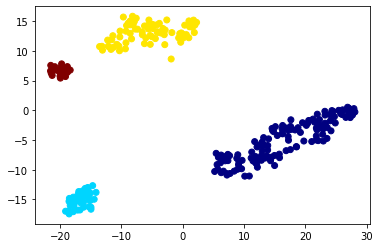

In [7]:
plt.scatter(X_tsne[outlier,0], X_tsne[outlier,1], c=y_dbscan[outlier], cmap="jet")
plt.show()

In [8]:
X['outlier'] = outlier
X.to_csv("./outlier.csv")

C:\Users\uyoung\AppData\Local\Temp\ipykernel_31060\1835983118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['outlier'] = outlier


New data

In [11]:
New = pd.read_csv("./Sample_A.csv")
New = New.iloc[:,1:]  # remove the first three columns

test_X = New.iloc[:,2:-1]  # new data
test_y = New.iloc[:,-1]    # y_label
test_X

,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66
0,2492,2219,4360,4926,3935,3857,3537,3074,2754
1,2717,2390,4945,5525,4214,4083,3797,3512,3106
2,2383,2105,4217,4775,3815,3636,3426,2960,2692
3,2630,2323,4751,5296,4080,3885,3645,3381,3032
4,2976,2600,4185,4973,4838,4740,4243,3396,3190
5,3129,2686,4765,5800,5086,4889,4464,3727,3449
6,2353,2284,2788,3030,3079,2949,2830,2582,2382
7,2275,2212,2614,2877,2855,2901,2848,2538,2286


In [12]:
test_X

,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66
0,2492,2219,4360,4926,3935,3857,3537,3074,2754
1,2717,2390,4945,5525,4214,4083,3797,3512,3106
2,2383,2105,4217,4775,3815,3636,3426,2960,2692
3,2630,2323,4751,5296,4080,3885,3645,3381,3032
4,2976,2600,4185,4973,4838,4740,4243,3396,3190
5,3129,2686,4765,5800,5086,4889,4464,3727,3449
6,2353,2284,2788,3030,3079,2949,2830,2582,2382
7,2275,2212,2614,2877,2855,2901,2848,2538,2286


In [13]:
test_y_dbscan = dbscan.fit_predict(test_X)
test_y_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

### Outlier Analysis

In [17]:
pass_ = [not i for i in outlier]
pass_

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 Fa

In [19]:
X

,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66,outlier
0,3347.0,2870.0,5451.0,6091.0,4945.0,4784.0,4556.0,4258.0,3807.0,True
1,3349.0,2889.0,5550.0,6164.0,4983.0,4817.0,4580.0,4281.0,3838.0,True
2,3362.0,2901.0,5523.0,6192.0,4961.0,4802.0,4567.0,4278.0,3851.0,True
3,3391.0,2877.0,5529.0,6233.0,5021.0,4853.0,4601.0,4322.0,3848.0,True
4,2576.0,2266.0,4759.0,5309.0,3849.0,3724.0,3475.0,3161.0,2913.0,True
...,...,...,...,...,...,...,...,...,...,...
401,3210.0,2744.0,4690.0,5732.0,5316.0,5205.0,4856.0,4143.0,3696.0,True
402,3153.0,2727.0,5104.0,6191.0,5043.0,4832.0,4571.0,4168.0,3592.0,False
403,2456.0,2194.0,4619.0,5030.0,3775.0,3592.0,3355.0,3049.0,2787.0,True
404,3281.0,2825.0,4784.0,5796.0,5489.0,5418.0,4951.0,4230.0,3749.0,True


In [28]:
Outlier = X[pass_]
Outlier=Outlier.iloc[:,:9]
Outlier

,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66
13,3062.0,2701.0,5043.0,5786.0,4608.0,4436.0,4101.0,3972.0,3396.0
21,2903.0,2520.0,4410.0,5328.0,4900.0,4684.0,4482.0,3922.0,3371.0
22,3005.0,2595.0,5278.0,5854.0,4454.0,4370.0,4067.0,3805.0,3456.0
24,2906.0,2523.0,5142.0,5944.0,4475.0,4269.0,4056.0,3761.0,3405.0
26,2987.0,2580.0,4436.0,5333.0,4805.0,4666.0,4351.0,3813.0,3412.0
...,...,...,...,...,...,...,...,...,...
395,3139.0,2593.0,5013.0,6221.0,5276.0,4977.0,4641.0,4076.0,3579.0
396,2583.0,2270.0,3975.0,5163.0,4582.0,4443.0,4098.0,3295.0,2766.0
397,3022.0,2573.0,4201.0,5248.0,5632.0,5479.0,4948.0,3752.0,3254.0
400,3123.0,2685.0,5238.0,6311.0,5064.0,4890.0,4569.0,4041.0,3528.0


#### (1) DBSCAN

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 5 min__sample



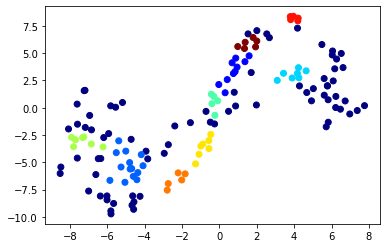

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 10 min__sample



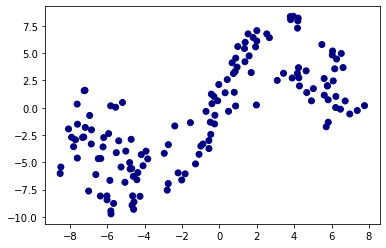

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 15 min__sample



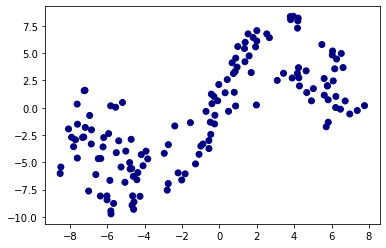

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 20 min__sample



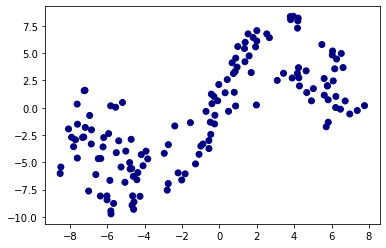

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


250 eps , 25 min__sample



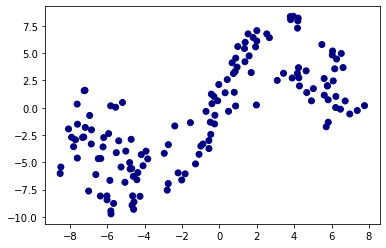

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 5 min__sample



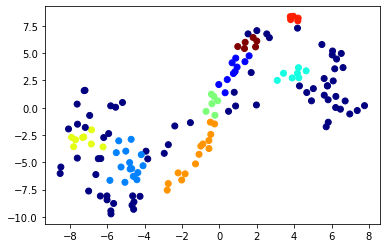

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 10 min__sample



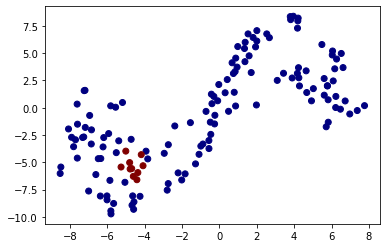

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 15 min__sample



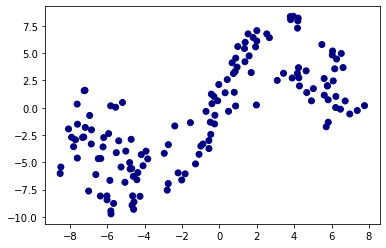

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 20 min__sample



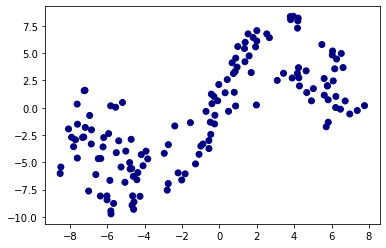

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


260 eps , 25 min__sample



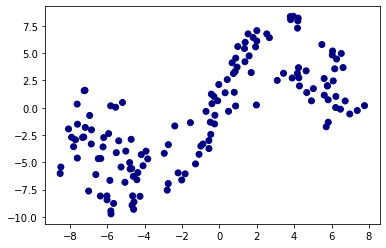

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 5 min__sample



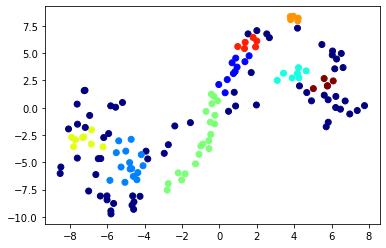

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 10 min__sample



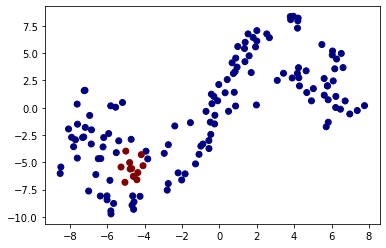

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 15 min__sample



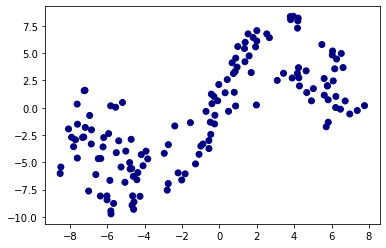

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 20 min__sample



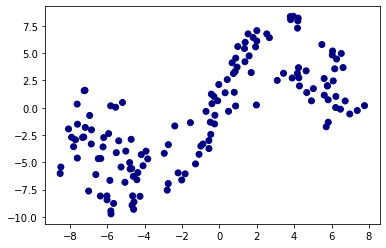

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


270 eps , 25 min__sample



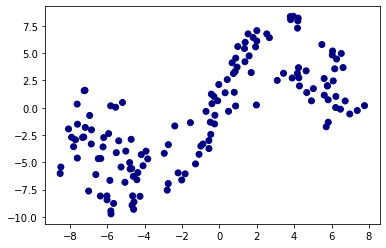

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 5 min__sample



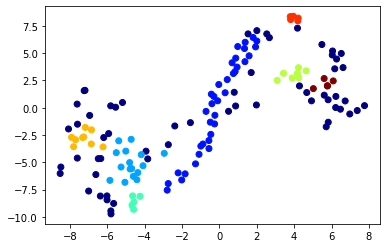

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 10 min__sample



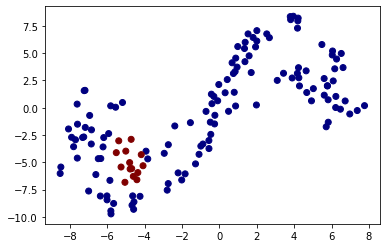

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 15 min__sample



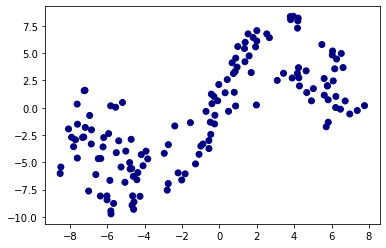

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 20 min__sample



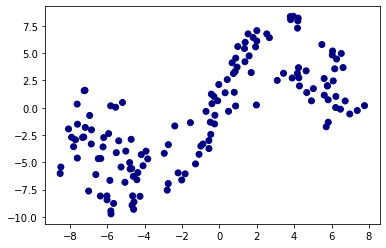

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


280 eps , 25 min__sample



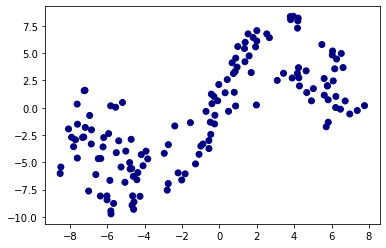

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 5 min__sample



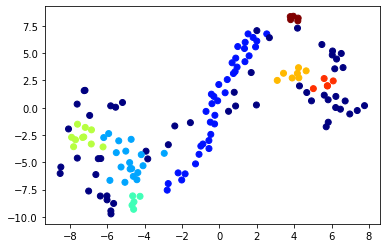

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 10 min__sample



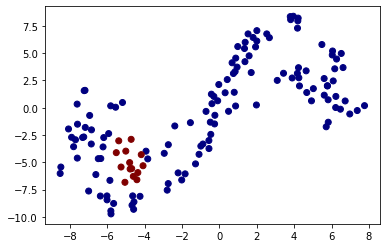

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 15 min__sample



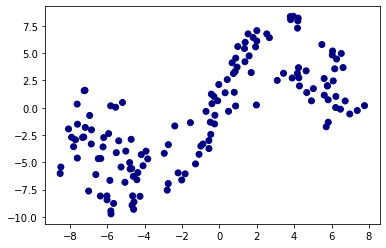

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 20 min__sample



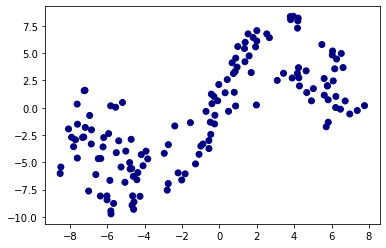

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


290 eps , 25 min__sample



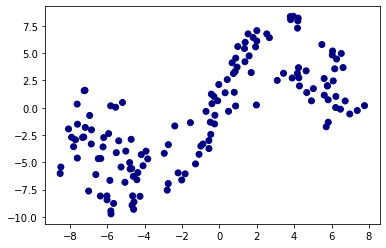

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 5 min__sample



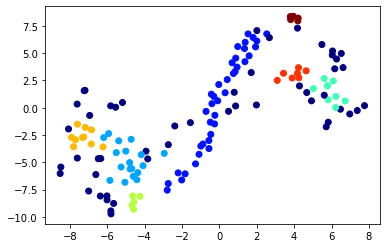

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 10 min__sample



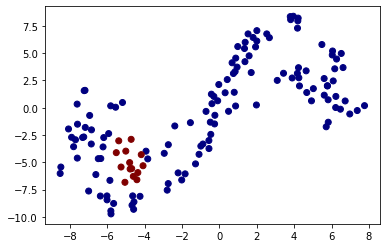

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 15 min__sample



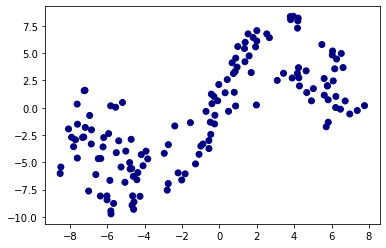

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 20 min__sample



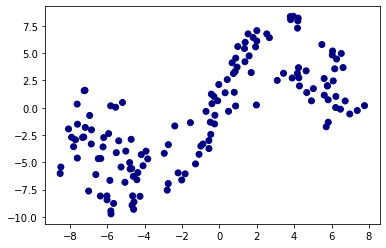

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


300 eps , 25 min__sample



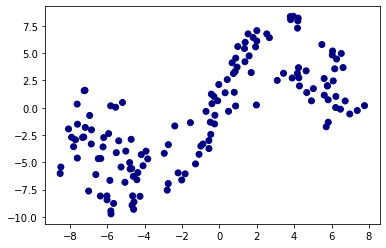

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 5 min__sample



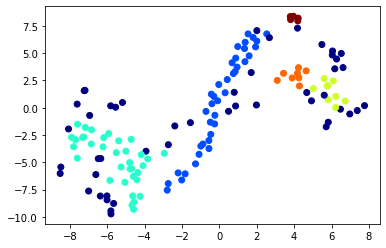

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 10 min__sample



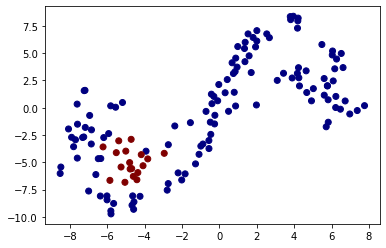

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 15 min__sample



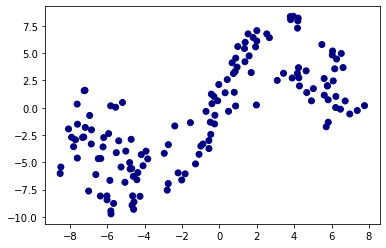

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 20 min__sample



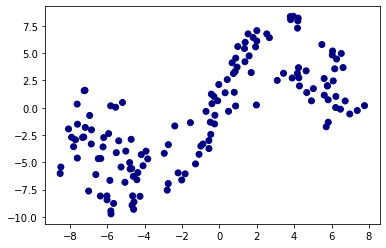

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


310 eps , 25 min__sample



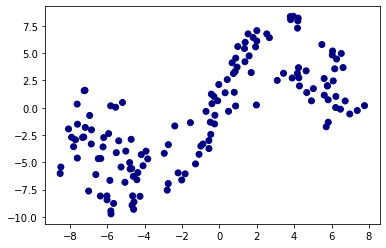

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 5 min__sample



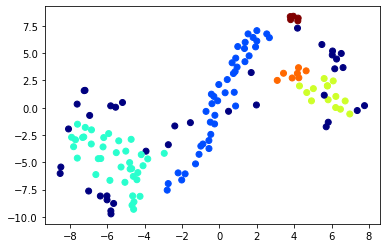

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 10 min__sample



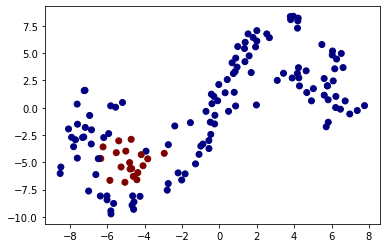

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 15 min__sample



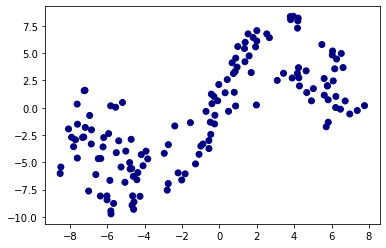

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 20 min__sample



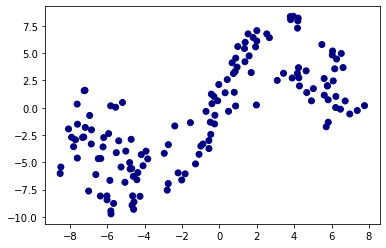

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


320 eps , 25 min__sample



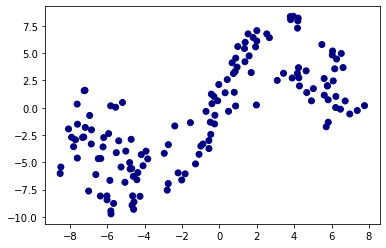

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 5 min__sample



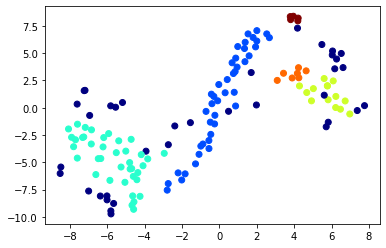

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 10 min__sample



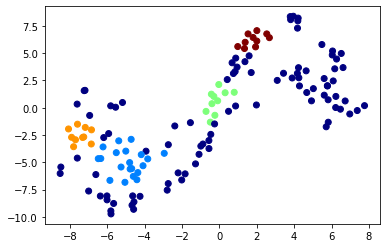

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 15 min__sample



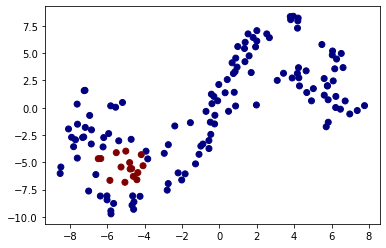

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 20 min__sample



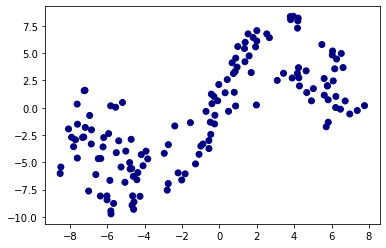

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


330 eps , 25 min__sample



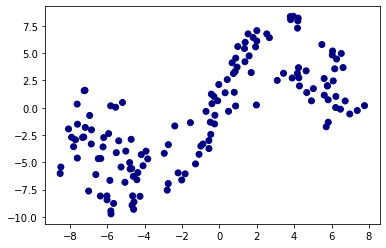

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 5 min__sample



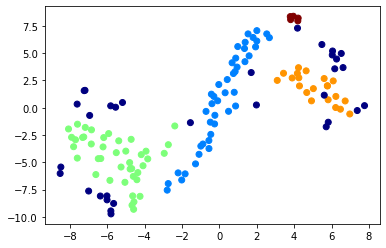

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 10 min__sample



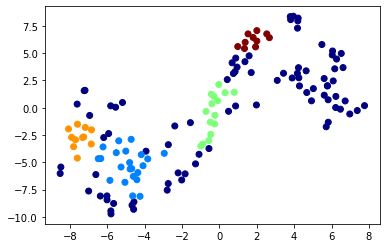

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 15 min__sample



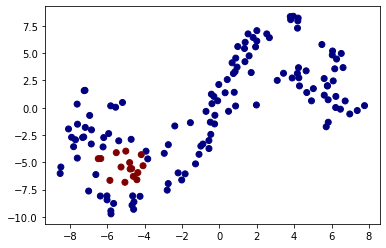

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 20 min__sample



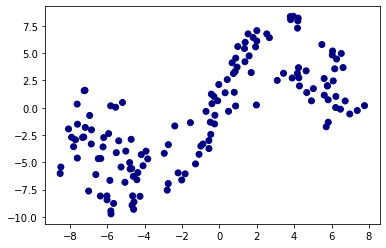

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


340 eps , 25 min__sample



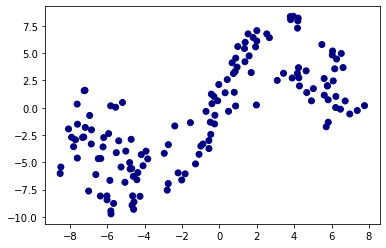

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 5 min__sample



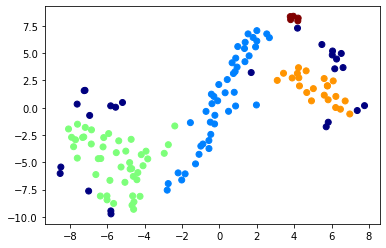

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 10 min__sample



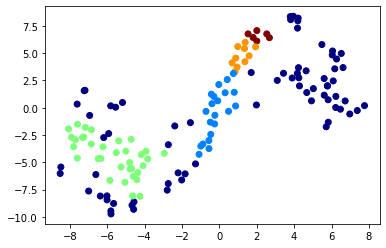

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 15 min__sample



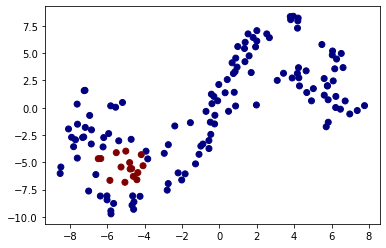

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 20 min__sample



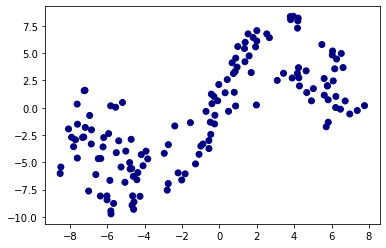

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


350 eps , 25 min__sample



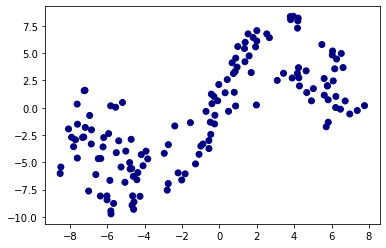

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 5 min__sample



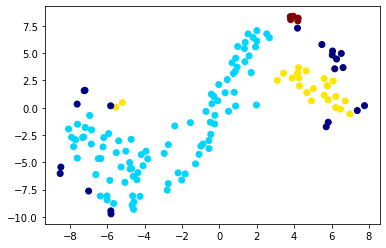

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 10 min__sample



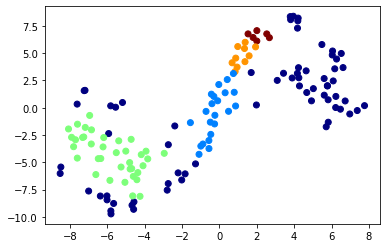

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 15 min__sample



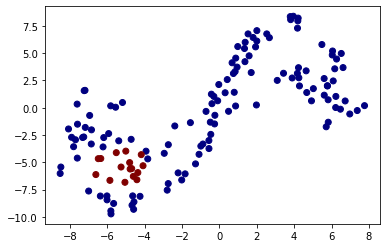

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 20 min__sample



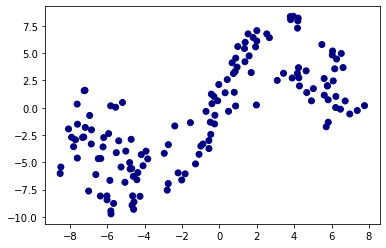

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


360 eps , 25 min__sample



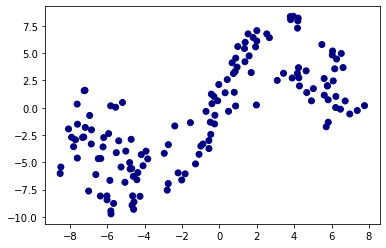

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 5 min__sample



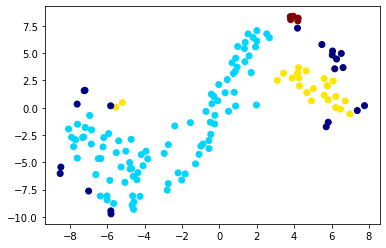

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 10 min__sample



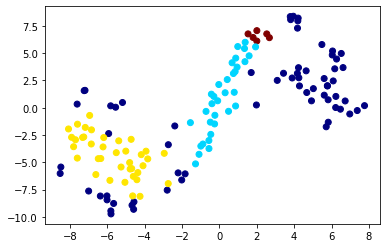

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 15 min__sample



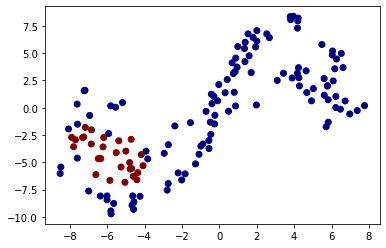

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 20 min__sample



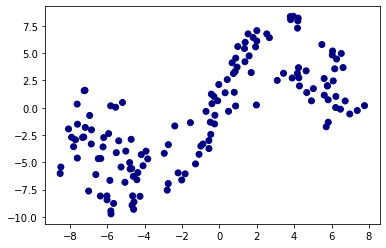

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


370 eps , 25 min__sample



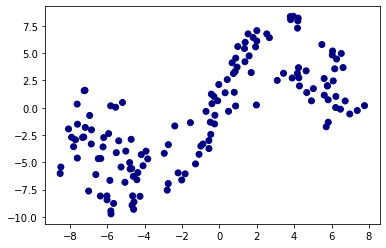

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 5 min__sample



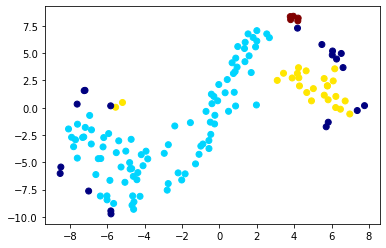

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 10 min__sample



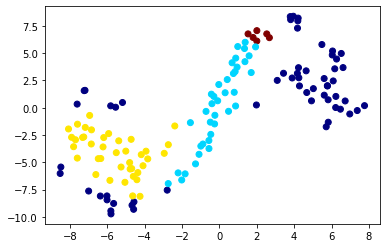

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 15 min__sample



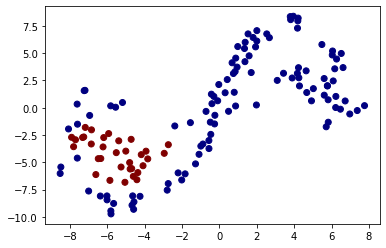

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 20 min__sample



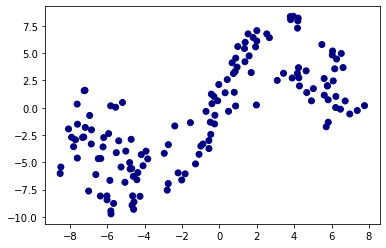

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


380 eps , 25 min__sample



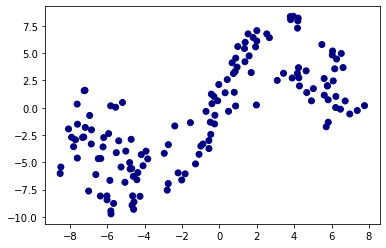

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 5 min__sample



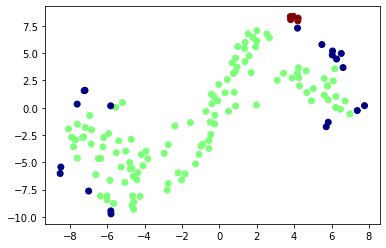

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 10 min__sample



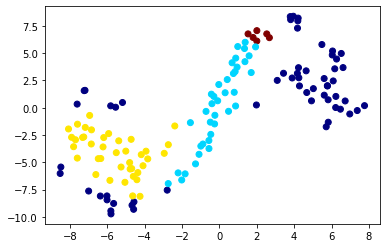

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 15 min__sample



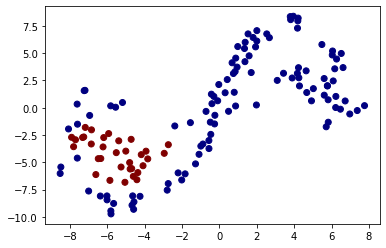

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 20 min__sample



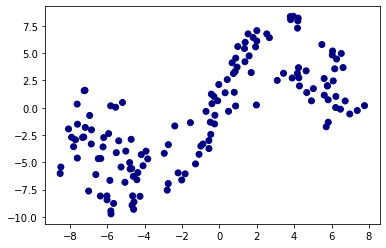

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


390 eps , 25 min__sample



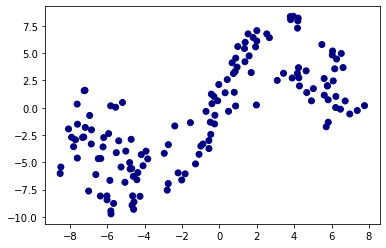

In [29]:
# create model and prediction
for i in range(250,400, 10):
    for k in range(5, 30, 5):
        dbscan = DBSCAN(eps=i,min_samples=k)
        clustering= dbscan.fit(Outlier)
        y_dbscan = dbscan.fit_predict(Outlier)
        y_pred = pd.DataFrame(y_dbscan)
        y_pred.columns=['predict']

        # concatenate labels to df as a new column
        r = pd.concat([Outlier,y_pred],axis=1)

        # print(r)
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(Outlier)
        
        print("{i} eps , {k} min__sample".format(i=i,k=k))
        
        print()
        plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_dbscan, cmap="jet")
        plt.show()

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


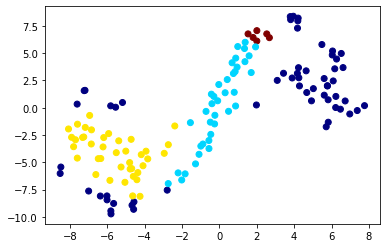

In [30]:
dbscan = DBSCAN(eps=390,min_samples=10)
clustering= dbscan.fit(Outlier)
y_dbscan = dbscan.fit_predict(Outlier)
y_pred = pd.DataFrame(y_dbscan)
y_pred.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([Outlier,y_pred],axis=1)

# print(r)


# TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Outlier)


plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_dbscan, cmap="jet")
plt.show()

#### (2) K-means clustering

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


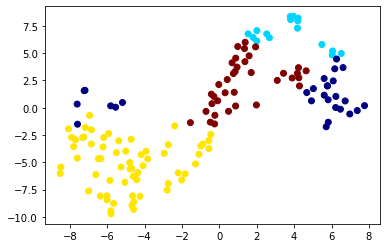

In [31]:
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(Outlier)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Outlier)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_pred, cmap="jet")